# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

No, the smartcab was not moving moving during the simulation.

Agent is recieving positive and negative rewards. Positive reward is given when a red light is there, because at red light cab is expected not to move and it is not moving. Negative reward is given when a green light is there, because at green light, cab is expected to move, yet it is not moving, hence it is getting punished(-ve reward).




### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
> In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.


       display      - set to True if you want GUI, else false. PyGame must be installed.
       enforce_deadline - set to True if you want to end simulation when deadline is over. Agent gets negative reward if he doesn't reach on destination in given time, positive otherwise.
       update_delay - controls time between two actions. It is continuous.
       
> In the environment.py Python file, what Environment class function is called when an agent performs an action?

`act` function is called when an agent performs an action. It performs the action if the action is legal and recieves a reward based on traffic rule.

> In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?

`render_text()` disables GUI, showing the outputs on terminal, while `render()` shows output in GUI.

> In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?

It will check for east-west direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


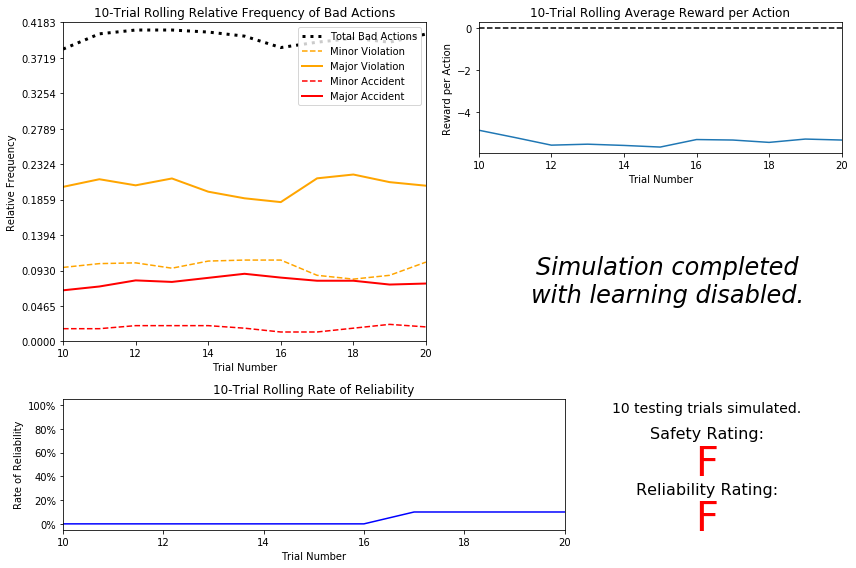

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** 
> How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?

Approx 40% time bad decision is made by driver. About 25% of of bad decision(10% in total) are accidents. By accident, I mean major and minor accidents.

> Given that the agent is driving randomly, does the rate of reliability make sense?

Yes, rate of reliabilty makes sense here because my model is random and it is learning nothing. However, it sets a minimum benchmark for a model i.e. all models should perform atleast better than random model. Also, it can be seen from Rate of reliability graph that max reliability is approx 10%, which  is not at all reliable in this case.


> What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?

If we talk about individual responses, then agent is recieving positive rewards for logical decisions and negative rewards for any decision which causes accidents and/or violation. Since, this model is a random model, hence it can be intutively said that it will perform very badly. This can be seen from Rewards per action vs Trial number graph, where average reward per action is less than -4 for every example. These rewards also suggest that this model is penalized heavily.

> As the number of trials increases, does the outcome of results change significantly?

Since, this is a random model without any learning, increasing number of trials will not have any effec on outcome of results. This can be verified from the fact that there is no significant increase in rate of reliability and rewards per action. Infact, any increase or decrease in rate of reliability or rewards is due to model randomness.

> Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?

In any case, this Smartcab can't be considered as safe. Results of testing trials simulation say that safety and reliability rating is **F**. In real world too, you can't trust on drivers who randomly move steering wheel without seeing the traffic.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** For safety, most important feature is light color. Cab is not intended to move when there is red light or major accidents may happen.


Other factors are `left` and `oncoming`. If I have to turn left, then I have to worry about the vechiles which are on my left. Similarily, if I have oncoming traffic, then I have to woory about the directions in which they will turn.

Factors which I haven't considered are `right` and `deadline`. I am assuming that if I am moving on right side of road and intend to take a turn, then in most cases I will have no vechiles to my `right`. So, I don't have to worry about the vechiles in my right. `deadline` is a feature which can be learned during the training using rewards. I can include that in my feature list, but that would require more data and time to train.

For efficiency, `waypoint` and `deadline` are two important features. `Waypoint` gives optimal direction using manhattan distance, so I have included that in features list. `deadline` is not included due to reasons stated in above paragraph.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** I have chosen the following tuple
        
        state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])
        
Size of state space will be: 3 \* 2 \* 4 \* 4 = 96

Reason:

- Waypoint will have 3 distinct values
- inputs['light'] will have 2 distinct values
- inputs['left'] will have 4 distinct values
- inputs['oncoming'] will have 4 distinct values

I think 96 is not too large value. It is possible to learn policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

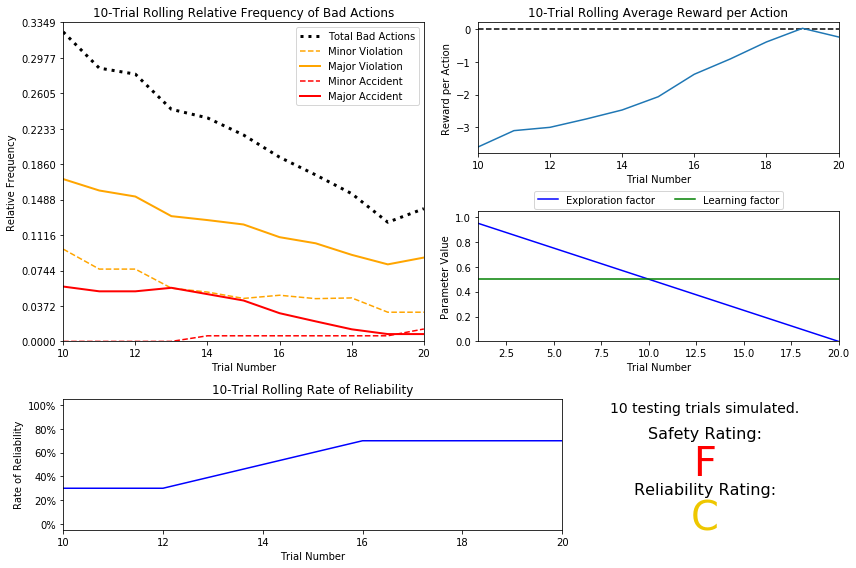

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Initial values of rate of reliabilty and frequency of bad actions are somewhat same in both basic driving agent and default Q-Learning agent.


Driving agent required 20 trials before testing started. It makes perfect sense because decay rate is 0.05 and it will require 20 iteration to bring down epsilon value to 0.05.


Yes epsilon decrement is accurately represented in parameters panel. It's value is linearly decreasing with number of trials.


As it can be seen from bad actions and average rewards graph, first one decreases and second one increases with increase in number of trials. Intutively, we are applying a learning algorithm and selecting random actions with probability epsilon. Due to this, as training examples are being increased, new states are being discovered and discovered ones are being learned, which suggests that there should be increase in average reward per action and decrease in relative frequency of bad actions. *This intution might be wrong in cases where exploration factor falls below 0.5 too early or too late.*


As seen from the results, Safety score is same but reliability score is imporved. Model has improved, but still it's performance is bad. There is lot of improvement required in this model.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

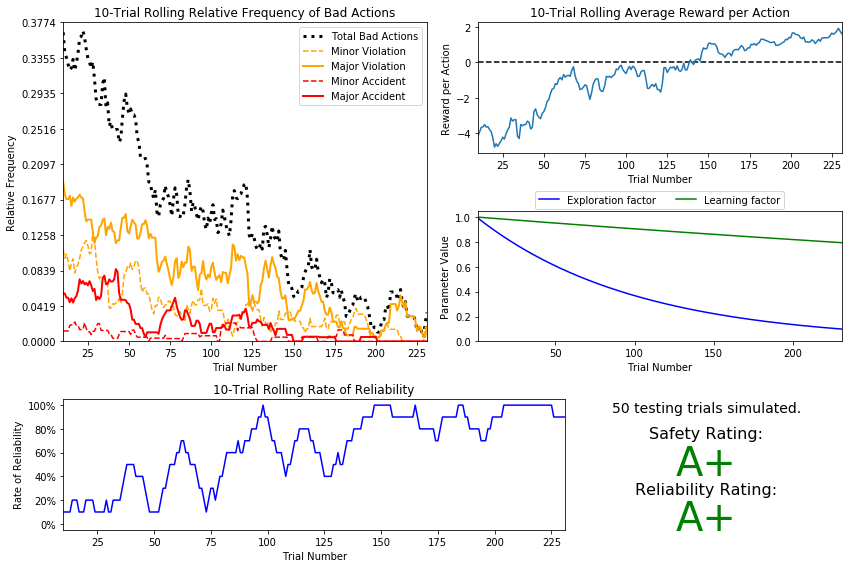

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
> What decaying function was used for epsilon (the exploration factor)?

Exponential decaying function was used. 

`epsilon = self.epsilon = math.e^(-0.01*self.train_no)` where train_no is training example number.

> Approximately how many training trials were needed for your agent before begining testing?

From parameter value, it can be seen that number of training trials is approx 240. It seems that graph never touches zero, but at approx trial number 240, parameter value reaches 0.1 which is threshold value. At that point, exploration value suddenly drops at zero.

> What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?

epsilon-tolerance = 0.1 and alpha = 0.9 . These value are based on an algorithm similar to gridsearchCV. I have selected few values of epsilon-tolerance, alphas and decay function and ran reinforcement search algorithm on few triplets. Then, I selected best among them.

> How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?

There is tremendous improvement compared to previous section. Safety grade is A+ and Reliability grade is A. Relative frequency of bad decisions is almost zero as compared to previous case when it was 0.14. Average reward approaches 1 as compared to previous one where avg reward is approximately 0. Reliability is approx 90% as compared to previous case, where it was approx 20%.  

> Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?

I trained on approx 240 examples and ran test on 50 examples, which is almost similar to 80-20 split. After running on those 50 cases, it scored A+ in safety and A in reliability. Due to this, it can be said that my driving agent successfully learned an appropriate policy.

> Are you satisfied with the safety and reliability ratings of the Smartcab?

I am satisfied with the safety and reliability ratings of the smartcab. Exploration factor drops to 50% at trial number 80. This means that it is more likely that agent will select a new random state till trial 80, then in next 160 trials, it is more likely to improve it. It might be possible that it is stuck in local minima, but scoring A on reliability and A+ safety on 50 test cases would be near impossible in that case.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**  A state is described by four feature tuple which are (waypoint, light, left, oncoming). Let's say that environment is in state (Right, Green, None, None). In this case, optimal policy will be to move right. Considering another state (Left, Red, Right, Left), optimal policy will be to wait and let oncoming and left cabs pass. Note that this policy may lead to deadlock, and some other algorithm is needed to resolve it.

Few more examples regarding optimal policy could be:

- If waypoint is forward and light is red, then cab should stop.
- If waypoint is right, light is green, there is no oncoming traffic and `left` is also None , then cab should move right.
- If waypoint is left, light is green and there is no oncoming traffic or it is making a left turn, then cab should move left, otherwise it should stop.


For first case(Right, Green, None, None), the following data was present in txt file. 

('right', 'green', None, None)
 - forward : 0.45
 - right : 1.25
 - None : -5.15
 - left : 0.35

For second case(Left, Red, Right, Left), following data was present in txt file.

('left', 'red', 'right', 'left')
 - forward : -10.81
 - right : 0.00
 - None : 1.59
 - left : -10.56
 

Above two cases demonstrate that my cab learned optimal policy. Reasons are described in first paragraph.

In following case, the policy is different than expected optimal policy.

('right', 'green', None, 'forward')
 - forward : 1.54
 - right : 1.42
 - None : -5.63
 - left : 0.19
 
 
In this case, waypoint is right, light is green, there are no vechiles on my left and oncoming traffic is trying to move forward and my agent moves in forward direction, which takes it away from destination.  
Reason for this policy to be different is that it might be possible that this combination occured very less number of times during model training. This also shows that grades of my model may decrease if I increase number of test cases, but in my defence, number of trials are also very less (240 approx). Increasing number of trials and then changing exploration factor will surely make this model better.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** 

**First reason**

Future reward will be a function of start and destination i.e. they will backpropogate results based on reliability rather than safety. Hence, all of their policies will be biased towards reliability and agent will not learn anything about safety policy. This will lead to more accidents. Due to this reason, future rewards won't work in this case.

**Second reason**

Currently the environment does not expose it's current coordinate location information to the Smartcab agent. Thus, my agent will not be biased towards any location. If we assume that agent was exposing it's current location in it's state, it might be possible that agent may learn something from it, which is undesired. Since, we are not including it's coordinates, it will use only it's current state to determine it's direction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.